In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.cluster import KMeans

In [ ]:
data_file = "wine.data"

features =[i.split(")")[1].strip() for i in """1) Alcohol
 	2) Malic acid
 	3) Ash
	4) Alcalinity of ash
 	5) Magnesium
	6) Total phenols
 	7) Flavanoids
 	8) Nonflavanoid phenols
 	9) Proanthocyanins
	10)Color intensity
 	11)Hue
 	12)OD280/OD315 of diluted wines
 	13)Proline""".split("\n")]

dataframe = pd.read_csv(data_file, names=["class"]+features)
dataframe

,class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [ ]:
print("MIN: ", dataframe["class"].max())
print("MAX: ", dataframe["class"].min())

MIN:  3
MAX:  1


In [ ]:
array = dataframe.values
X = array[:,1:]
y = array[:, 0]

print(X.shape)
print(y.shape)

(178, 13)
(178,)


In [ ]:
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(X)

kmeans_preds = kmeans.labels_ + 1
print(kmeans_preds)
print(kmeans.cluster_centers_)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 1 1
 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 3 1 3 3 1 1 1 3 3 2
 1 3 3 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 3 3 3 1 3 3 3 3 1 3
 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1 3 3 3 1 1 3 3 1 1 3 1
 1 3 3 3 3 1 1 1 3 1 1 1 3 1 3 1 1 3 1 1 1 1 3 3 1 1 1 1 1 3]
[[1.29298387e+01 2.50403226e+00 2.40806452e+00 1.98903226e+01
  1.03596774e+02 2.11112903e+00 1.58403226e+00 3.88387097e-01
  1.50338710e+00 5.65032258e+00 8.83967742e-01 2.36548387e+00
  7.28338710e+02]
 [1.38044681e+01 1.88340426e+00 2.42617021e+00 1.70234043e+01
  1.05510638e+02 2.86723404e+00 3.01425532e+00 2.85319149e-01
  1.91042553e+00 5.70255319e+00 1.07829787e+00 3.11404255e+00
  1.19514894e+03]
 [1.25166667e+01 2.49420290e+00 2.28855072e+00 2.08231884e+01
  9.23478261e+01 2.07072464e+00 1.75840580e+00 3.90144928e-01
  1.45188406e+00 4.08695651e+00 9.41159420e-01 2.49072464e+00
  4.58231884e+02]]


In [ ]:
accuracy_score(y, kmeans_preds)

0.1853932584269663

In [ ]:
print(kmeans_preds)
print(y)

[2 2 2 2 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 2 2 1 1 2 2 1 2 2 2 2 2 2 1 1
 2 2 1 1 2 2 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 3 1 3 1 3 3 1 3 3 1 1 1 3 3 2
 1 3 3 3 1 3 3 1 1 3 3 3 3 3 1 1 3 3 3 3 3 1 1 3 1 3 1 3 3 3 1 3 3 3 3 1 3
 3 1 3 3 3 3 3 3 3 1 3 3 3 3 3 3 3 3 3 1 3 3 1 1 1 1 3 3 3 1 1 3 3 1 1 3 1
 1 3 3 3 3 1 1 1 3 1 1 1 3 1 3 1 1 3 1 1 1 1 3 3 1 1 1 1 1 3]
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.]


In [ ]:
# Instanciando variáveis
inicio = 2
fim = 15
passo = 1

silhouette = {}
elbow = {}

num_clusters = list(range(inicio, fim+passo, passo))

In [ ]:
import matplotlib.pyplot as plt

def elbow_plot(erro: dict, clusters: str) -> None:
  maximo = max(erro.values())
  for key in erro:
    erro[key] = float(erro[key])/maximo
  g=plt.figure(1)
  plt.plot(list(erro.keys()), list(erro.values()), label='Método Elbow', color='b', linestyle='dashed')
  plt.ylabel('SSE', fontsize=18)
  plt.xlabel('Clusters', fontsize=18)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.legend(loc='upper right')
  plt.grid(linestyle='dotted', linewidth=1)
  plt.show()

def silhouette_plot(silhouette: dict, clusters: str) -> None:
  g=plt.figure(2)
  plt.plot(list(silhouette.keys()), list(silhouette.values()), label="Método Silhouette", color='g')
  plt.ylabel('Silhouette Score', fontsize=18)
  plt.xlabel('Clusters', fontsize=18)
  plt.xticks(fontsize=18)
  plt.yticks(fontsize=18)
  plt.legend(loc='upper right')
  plt.grid(linestyle='dotted', linewidth=1)
  plt.show()

Testando k = 2
Testando k = 3
Testando k = 4
Testando k = 5
Testando k = 6
Testando k = 7


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

Testando k = 8
Testando k = 9
Testando k = 10


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testando k = 11
Testando k = 12
Testando k = 13


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Testando k = 14
Testando k = 15


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


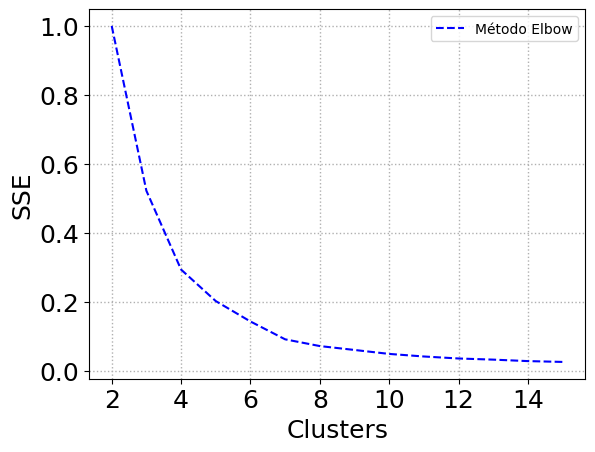

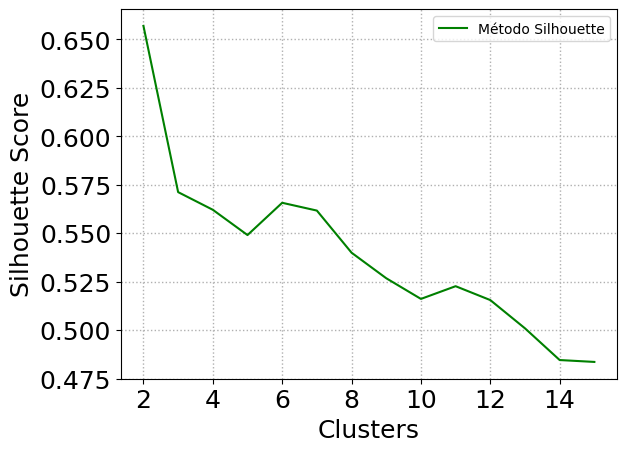

In [ ]:
from sklearn.metrics import silhouette_score

for k in num_clusters:
  print(f"Testando k = {k}")
  model = KMeans(n_clusters=k, max_iter=1000)
  model.fit(X)
  elbow[k] = model.inertia_
  preds = model.predict(X)
  silhouette[k] = silhouette_score(X, preds)

elbow_plot(elbow,  clusters=str(fim))
silhouette_plot(silhouette, clusters=str(fim))
# print(elbow)
# print(silhouette)


# **Testando desepenho do KMeans para classificação**

In [ ]:
from sklearn.datasets import load_breast_cancer
from sklearn.linear_model import LogisticRegression

data = load_breast_cancer()
X = data.data
y = data.target

lr = LogisticRegression()
lr.fit(X, y)
preds = lr.predict(X)

accuracy_score(y, preds)


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.9472759226713533

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
preds = kmeans.labels_
accuracy_score(y, np.logical_not(preds).astype(int))

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


0.8541300527240774

In [ ]:
print(preds)
print(np.logical_not(preds).astype(int))

[1 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 1 0 0 0 0 1 1 1 0 1 1 1 1 0 1 1 1 1 0
 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 1 0
 0 1 0 1 1 0 0 0 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0
 0 0 0 0 0 0 0 1 1 0 1 1 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 1 0 0 0 0 1 1 0 1 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 1 1 1 0 0
 0 1 0 0 0 0 0 0 0 0 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 1 0 0
 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1 1 0 1 0 0 0 0 1 0 0 0 0 0 1 0 1 1 1 0 1 0 1
 0 1 1 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0
 0 0 1 0 1 0 1 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0
 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 1 0 0
 1 0 1 0 0 1 0 1 0 0 0 0 0 0 0 0 1 1 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 1 0 0 0 1 1 